## Electric Vehicle Population Data Analysis

### Objective:
The objective of this analysis is to present insights on adoption of the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs)

### Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

### Load the data

In [2]:
df = pd.read_csv("C:\Project\Innomatics\ML\ML phase2\dataset.csv")

In [3]:
# Shape of the dataset
df.shape

(112634, 17)

The dataset has 112634 rows and 17 columns

In [4]:
# Checking first five rows of the dataset
df.head()

VIN (1-10)     County      City State  Postal Code  Model Year       Make  \
0  JTMEB3FV6N     Monroe  Key West    FL        33040        2022     TOYOTA   
1  1G1RD6E45D      Clark  Laughlin    NV        89029        2013  CHEVROLET   
2  JN1AZ0CP8B     Yakima    Yakima    WA        98901        2011     NISSAN   
3  1G1FW6S08H     Skagit  Concrete    WA        98237        2017  CHEVROLET   
4  3FA6P0SU1K  Snohomish   Everett    WA        98201        2019       FORD   

        Model                   Electric Vehicle Type  \
0  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
2        LEAF          Battery Electric Vehicle (BEV)   
3     BOLT EV          Battery Electric Vehicle (BEV)   
4      FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible              42   
1           Clean Alternative Fuel Vehicle Eligible              38   
2           Clean Alternative Fuel Vehicle Eligible              73   
3           Clean Alternative Fuel Vehicle Eligible             238   
4             Not eligible due to low battery range              26   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                   NaN       198968248   
1          0                   NaN         5204412   
2          0                  15.0       218972519   
3          0                  39.0       186750406   
4          0                  38.0         2006714   

              Vehicle Location        Electric Utility  2020 Census Tract  
0    POINT (-81.80023 24.5545)                     NaN        12087972100  
1  POINT (-114.57245 35.16815)                     NaN        32003005702  
2  POINT (-120.50721 46.60448)              PACIFICORP        53077001602  
3   POINT (-121.7515 48.53892)  PUGET SOUND ENERGY INC        53057951101  
4  POINT (-122.20596 47.97659)  PUGET SOUND ENERGY INC        53061041500

In [5]:
# Checking the duplicates in the dataset
df.duplicated().sum()

0

In [6]:
# Columns in the datset
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

 In the analysis, we are not going to need coulms with 'VIN (1-10)','Postal Code','Legislative District','DOL Vehicle ID','Electric Utility','2020 Census Tract'. Therefore, we need to remove these columns. Moreover, the column names need to be standarized to so that they are easy to be recalled throughout our EDA.

In [7]:
# Dropping the columns 
df.drop(['VIN (1-10)','Postal Code','Legislative District','DOL Vehicle ID','Electric Utility','2020 Census Tract'],axis=1,inplace=True)

In [8]:
df.head()

County      City State  Model Year       Make       Model  \
0     Monroe  Key West    FL        2022     TOYOTA  RAV4 PRIME   
1      Clark  Laughlin    NV        2013  CHEVROLET        VOLT   
2     Yakima    Yakima    WA        2011     NISSAN        LEAF   
3     Skagit  Concrete    WA        2017  CHEVROLET     BOLT EV   
4  Snohomish   Everett    WA        2019       FORD      FUSION   

                    Electric Vehicle Type  \
0  Plug-in Hybrid Electric Vehicle (PHEV)   
1  Plug-in Hybrid Electric Vehicle (PHEV)   
2          Battery Electric Vehicle (BEV)   
3          Battery Electric Vehicle (BEV)   
4  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible              42   
1           Clean Alternative Fuel Vehicle Eligible              38   
2           Clean Alternative Fuel Vehicle Eligible              73   
3           Clean Alternative Fuel Vehicle Eligible             238   
4             Not eligible due to low battery range              26   

   Base MSRP             Vehicle Location  
0          0    POINT (-81.80023 24.5545)  
1          0  POINT (-114.57245 35.16815)  
2          0  POINT (-120.50721 46.60448)  
3          0   POINT (-121.7515 48.53892)  
4          0  POINT (-122.20596 47.97659)

In [9]:
# Checking the su of null values in the datset
df.isna().sum()

County                                                0
City                                                  0
State                                                 0
Model Year                                            0
Make                                                  0
Model                                                20
Electric Vehicle Type                                 0
Clean Alternative Fuel Vehicle (CAFV) Eligibility     0
Electric Range                                        0
Base MSRP                                             0
Vehicle Location                                     24
dtype: int64

In [10]:
# Dropping the null values
df = df.dropna()

In [11]:
# Renaming columns for standarizing columns to enhance readability
df = df.rename(columns={
    'Model Year' : 'Model_year',
    'Electric Vehicle Type' : 'EV_type',
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility' : 'clean_alternate_fv',
    'Electric Range': 'electric_range',
    'Base MSRP' : 'price',
    'Vehicle Location':'vehicle_location'
})

In [13]:
# Top 10 Counties 
Counties = df.groupby('County').count().sort_values(by='City',ascending=False)['City'].index
values = df.groupby('County').count().sort_values(by='City',ascending=False)['City'].values

px.bar(x=list(Counties)[:10],y=values[:10],labels={'x':"County Name",'y':"Number of Cars"},color=values[:10],title='Top 10 Counties')


### Top Manufactures of Electric Vehicles

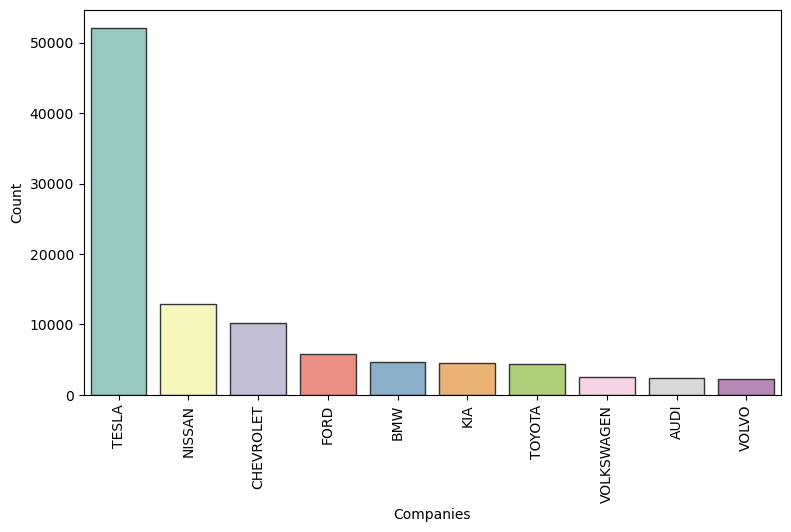

In [14]:
#Company makes most of the electric vehicles
Companies = df.groupby('Make').count().sort_values(by='City',ascending=False)['City'].index
values = df.groupby('Make').count().sort_values(by='City',ascending=False)['City'].values


plt.figure(figsize=(9,5))
sns.barplot(x=list(Companies)[:10],y=values[:10],edgecolor='.2',palette='Set3')
plt.xticks(rotation='vertical')
plt.xlabel('Companies')
plt.ylabel('Count')
plt.show()

In [15]:
px.pie(names=list(Companies)[:10],values=values[:10],width=500,height=400)

Let's check how many types of EVs are there in our dataset. We also need to know how many units of each type are there and finally calculate number of each type of vehicles produced by each maker.

In [16]:
ev_types = df.pivot_table(index='Make', columns = 'EV_type', aggfunc='size', fill_value=0).reset_index()
ev_types.columns.name = None
ev_types.columns = ['Make', 'Battery Electric Vehicle (BEV)', 'Plug-in Hybrid Electric Vehicle (PHEV)']
ev_types_BEV = ev_types.sort_values(by = 'Battery Electric Vehicle (BEV)', ascending = False).head(10)
ev_types_PHEV = ev_types.sort_values(by = 'Plug-in Hybrid Electric Vehicle (PHEV)', ascending = False).head(10)
ev_types_PHEV.head()

Make  Battery Electric Vehicle (BEV)  \
5   CHEVROLET                            5285   
31     TOYOTA                              59   
3         BMW                             905   
9        FORD                            2178   
6    CHRYSLER                               0   

    Plug-in Hybrid Electric Vehicle (PHEV)  
5                                     4894  
31                                    4344  
3                                     3775  
9                                     3635  
6                                     1794

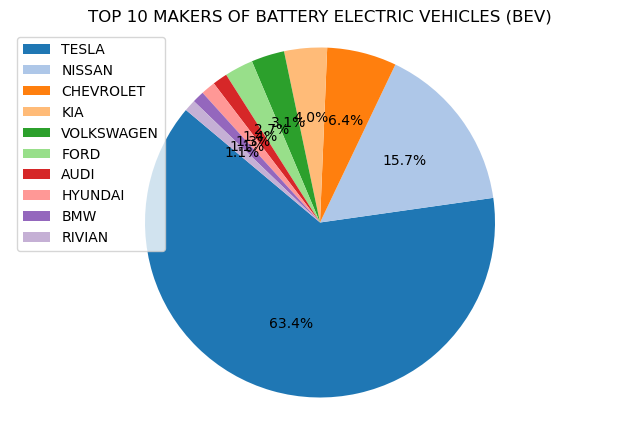

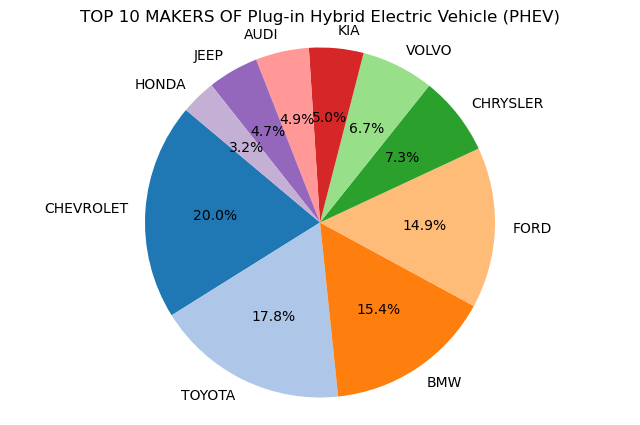

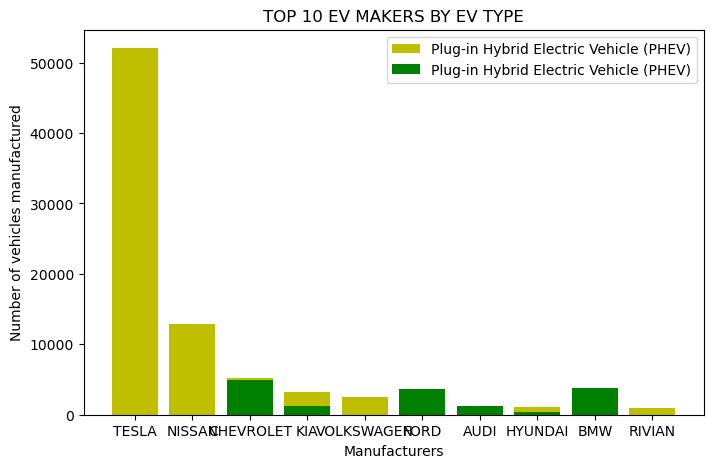

In [17]:
# Let us plot two types of EVs in seperate pie charts. 
# Plot Battery Electric Vehicles (BEV)
plt.figure(figsize=(8, 5))
plt.pie(ev_types_BEV['Battery Electric Vehicle (BEV)'], autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('TOP 10 MAKERS OF BATTERY ELECTRIC VEHICLES (BEV)')
plt.axis('equal')
plt.legend(ev_types_BEV['Make'])
plt.show()

# Plot Plug-in Hybrid Electric Vehicle (PHEV)
plt.figure(figsize=(8, 5))
plt.pie(ev_types_PHEV['Plug-in Hybrid Electric Vehicle (PHEV)'], labels = ev_types_PHEV['Make'], autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('TOP 10 MAKERS OF Plug-in Hybrid Electric Vehicle (PHEV)')
plt.axis('equal')
plt.show()

# Let us visualize in a stacked over bar chart
plt.figure(figsize=(8,5))
plt.bar(ev_types_BEV['Make'], ev_types_BEV['Battery Electric Vehicle (BEV)'], color = 'y')
plt.bar(ev_types_BEV['Make'], ev_types_BEV['Plug-in Hybrid Electric Vehicle (PHEV)'], color = 'g')
plt.legend(df['EV_type'])
plt.title('TOP 10 EV MAKERS BY EV TYPE')
plt.xlabel('Manufacturers')
plt.ylabel('Number of vehicles manufactured')
plt.show()


### Top 10 Selling Models

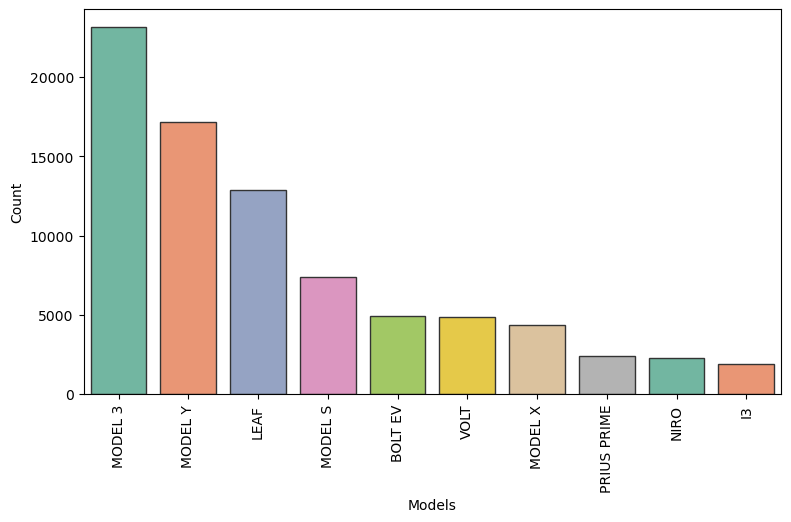

In [18]:
#Top 10 models in use

Models = df.groupby('Model').count().sort_values(by='City',ascending=False)['City'].index
values = df.groupby('Model').count().sort_values(by='City',ascending=False)['City'].values


plt.figure(figsize=(9,5))
sns.barplot(x=list(Models)[:10],y=values[:10],edgecolor='.2',palette='Set2')
plt.xticks(rotation='vertical')
plt.xlabel('Models')
plt.ylabel('Count')
plt.show()

### Most Selling Model for each company

In [19]:

#lets consider the top 10 companies
top_10_companies = list(Companies)[:10]
for i in top_10_companies:
    data = df[df['Make']==i]
    data = data.groupby('Model').count().sort_values(by='City',ascending=False).index
    print('Top selling model for',i,'is ----------->',data[0])

Top selling model for TESLA is -----------> MODEL 3
Top selling model for NISSAN is -----------> LEAF
Top selling model for CHEVROLET is -----------> BOLT EV
Top selling model for FORD is -----------> FUSION
Top selling model for BMW is -----------> I3
Top selling model for KIA is -----------> NIRO
Top selling model for TOYOTA is -----------> PRIUS PRIME
Top selling model for VOLKSWAGEN is -----------> ID.4
Top selling model for AUDI is -----------> E-TRON
Top selling model for VOLVO is -----------> XC90


<Axes: xlabel='electric_range', ylabel='Count'>

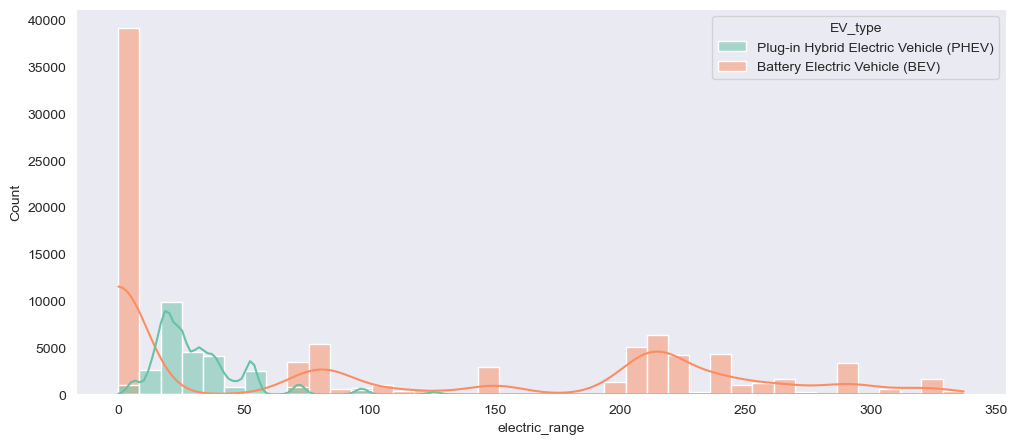

In [20]:
#lets see the electric range difference between PHEV and BEV
plt.figure(figsize=(12,5))
sns.set_style(style='dark')
sns.histplot(x = 'electric_range',data=df,kde=True,hue='EV_type',palette='Set2')

<Axes: xlabel='Model_year', ylabel='count'>

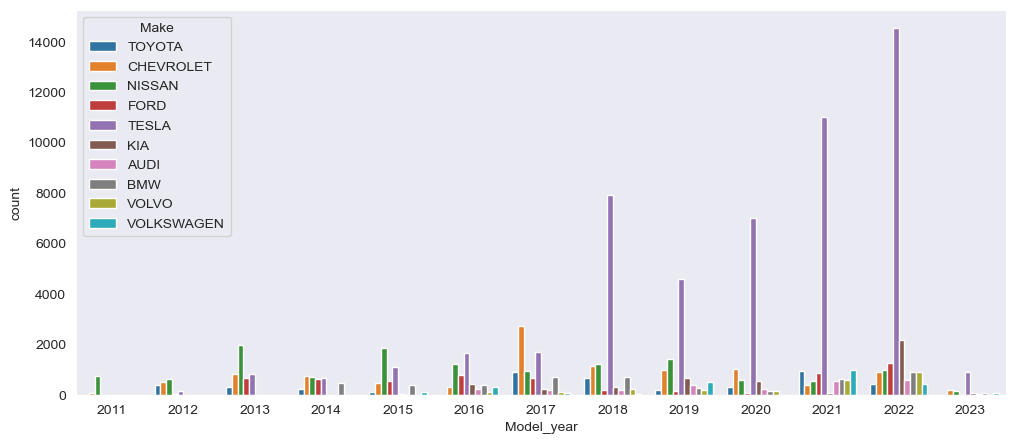

In [21]:
#Number of models of company for each year for last 10 years
#lets consider top_10 companies only

data = df.copy()
data['top_10'] = data['Make'].apply(lambda x:1 if x in top_10_companies else 0)
data = data[data['top_10']==1]
data = data[data['Model_year']>=2011]
plt.figure(figsize=(12,5))
sns.countplot(x = 'Model_year',hue='Make',data=data)

Earlier Nissan and Chevy used to top in the market but later on Tesla took over it. So we will check about Tesla

In [22]:

#1.which state is having more number of TESLA vehicles
#2.Model of which year is in use the most from TESLA

data_TESLA = df[df['Make']=='TESLA']
top_10_states_TESLA = list(data_TESLA.groupby('State').count().sort_values(by='City',ascending=False)['City'].index)[:10]
values = list(data_TESLA.groupby('State').count().sort_values(by='City',ascending=False)['City'].values)[:10]


<Axes: >

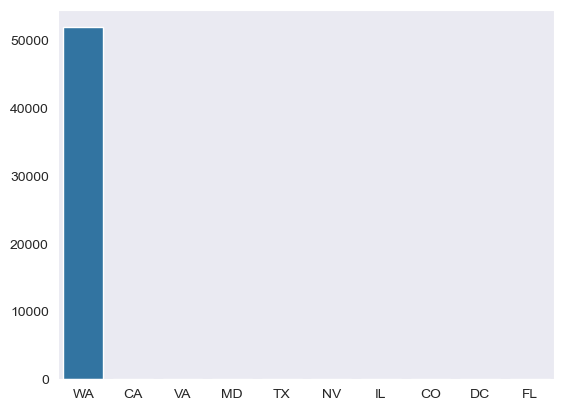

In [23]:
sns.barplot(x = top_10_states_TESLA,y=values)

This dataset is having Vehicles information of only Washington State.

<Axes: >

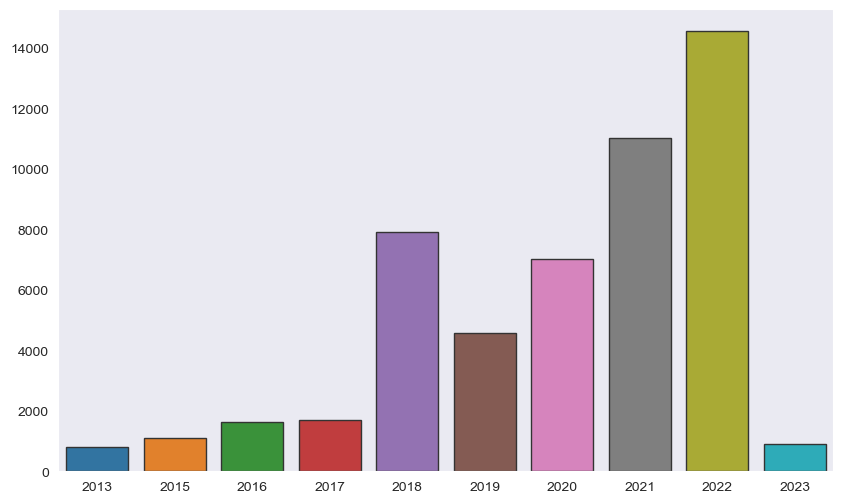

In [24]:
data_TESLA = df[df['Make']=='TESLA']
plt.figure(figsize=(10,6))
top_10_year_TESLA = list(data_TESLA.groupby('Model_year').count().sort_values(by='City',ascending=False)['City'].index)[:10]
values = list(data_TESLA.groupby('Model_year').count().sort_values(by='City',ascending=False)['City'].values)[:10]
sns.barplot(x = top_10_year_TESLA,y=values,edgecolor='.2')

Most models are of Tesla which are sold in 2022

## Create a Choropleth using plotly.express to display the number of EV vehicles based on location.

In [25]:
states = list(df.groupby('State').count().sort_values(by='City',ascending=False)['City'].index)
values = df.groupby('State').count().sort_values(by='City',ascending=False)['City'].values

In [26]:
data = pd.DataFrame(df.groupby('State').count().sort_values(by='City',ascending=False)['City'])
data = data.reset_index()
data.columns = ['State','Count']
fig = px.choropleth(data,
                    locations='State', 
                    locationmode="USA-states", 
                    color='Count',
                    color_continuous_scale="blues", 
                    scope="usa")

fig.show()

##  Create a Racing Bar Plot to display the animation of EV Make and its count each year.


In [27]:
# Importing the bar-chart-race module
import bar_chart_race as bcr

In [28]:
maker_count = df.groupby(['Model_year', 'Make']).size().unstack()

In [29]:
bcr.bar_chart_race(
    df=maker_count, 
    title='EV Makes and their Count Over Years',
    orientation='h', 
    sort='desc', 
    n_bars=10, 
    steps_per_period=45, 
    period_length=3000,
    cmap='dark24',
    period_label={'x': .95, 'y': .15,
                  'ha': 'right',
                  'va': 'center',
                  'size': 20,
                  'weight': 'semibold'
                  },
    period_fmt='{x:.0f}',
    bar_label_size=7,
    tick_label_size=7,
    bar_size=0.95

)